In [ ]:
### Data cleaning
### Author: Sergio Parra 
### Edited: Eduardo Zago

In [20]:
paquetes<-c("tidyverse","lubridate","stringr","janitor","tm","openxlsx")

sapply(paquetes,
       function(x) {
         if(!x %in% rownames(installed.packages()))
           install.packages(x)
         require(x, character.only=T)})
rm(list=setdiff(ls(),c("")))

tidyverse lubridate   stringr   janitor        tm  openxlsx 
     TRUE      TRUE      TRUE      TRUE      TRUE      TRUE

In [2]:
#tweets <- read.xlsx("Tuits_compilados_1.xlsx")
tweets <- read.csv("tweets_lastw.csv")

In [6]:
head(tweets,20)

,author_id,text,original_text
,<dbl>,<chr>,<chr>
1,1.083082e+18,JORGE RAMOS ENLOQUECE! AMLO LO PONE EN SU LUGAR COMO CHAYOTERO DE EUA. H... https://t.co/czhIvHccmp via @YouTube,JORGE RAMOS ENLOQUECE! AMLO LO PONE EN SU LUGAR COMO CHAYOTERO DE EUA. H... https://t.co/czhIvHccmp via @YouTube
2,1.168606e+18,🔴ESPERANDO LA SALIDA DE AMLO EN PUEBLA https://t.co/i4czPGbxGd a través de @YouTube,🔴ESPERANDO LA SALIDA DE AMLO EN PUEBLA https://t.co/i4czPGbxGd a través de @YouTube
3,1.472340e+18,@leonelangello9 Salinas es el más ratero pero todos los demás igualitos! menos amlo!,@leonelangello9 Salinas es el más ratero pero todos los demás igualitos! menos amlo!
4,3.000280e+09,"@mama_miau67 @sofia_psic @armando74prest1 @Oowr Esta solo se hace p3ndeja bien que sabe a quien y cuando se refiere, seguro sigue creyendo en el malnacido del kks. Éste video es lo mas terrible que he visto pero dicen que hay peores!! Malnacido amlo TE ABORRECEMOS!!!","@mama_miau67 @sofia_psic @armando74prest1 @Oowr Esta solo se hace p3ndeja bien que sabe a quien y cuando se refiere, seguro sigue creyendo en el malnacido del kks. Éste video es lo mas terrible que he visto pero dicen que hay peores!! Malnacido amlo TE ABORRECEMOS!!!"
5,9.373472e+07,"🗣 Desde el Gimnasio ""Miguel Hidalgo"" de la capital poblana, #AMLO consideró que se debe seguir con el impulso que permitió al campo mantenerse sin caídas en los peores meses de la pandemia ⬇️ https://t.co/FuUpBXCd10","🗣 Desde el Gimnasio ""Miguel Hidalgo"" de la capital poblana, #AMLO consideró que se debe seguir con el impulso que permitió al campo mantenerse sin caídas en los peores meses de la pandemia ⬇️ https://t.co/FuUpBXCd10"
6,1.236385e+18,"CLAUDIA,BRUJA ZOPILOTA,CÁLLATE,PONTE A TRABAJAR,DICES PURAS ESTUPIDECES""SIGUES EN CAMPAÑA""NUNCA SERÁS PRESIDENTA,DEBERÍAS ESTAR EN LA CÁRCEL""CULPABLE DE LA TRAGEDIA METREO-12,ARRASTRADA LAMBISCONA,FLORERO Y CHACHA LAMEBOTAS DE TÚ AMO Y DUEÑO AMLO""PENDEJO IGNORANTE HOCICON""INÚTIL. https://t.co/2mQsYPrE8P","CLAUDIA,BRUJA ZOPILOTA,CÁLLATE,PONTE A TRABAJAR,DICES PURAS ESTUPIDECES""SIGUES EN CAMPAÑA""NUNCA SERÁS PRESIDENTA,DEBERÍAS ESTAR EN LA CÁRCEL""CULPABLE DE LA TRAGEDIA METREO-12,ARRASTRADA LAMBISCONA,FLORERO Y CHACHA LAMEBOTAS DE TÚ AMO Y DUEÑO AMLO""PENDEJO IGNORANTE HOCICON""INÚTIL. https://t.co/2mQsYPrE8P"
7,3.965549e+08,"@carla_ponti Lamentable que todo lo que dice AMLO, va dirigido a mucha gente humilde que no ha tenido la oportunidad de viajar, y lo que busca es crecer su ego, su popularidad. Aquí el problema es que nadie desmiente o corrige lo dicho por el. Noticieros no hay éticos a favor de la verdad.","@carla_ponti Lamentable que todo lo que dice AMLO, va dirigido a mucha gente humilde que no ha tenido la oportunidad de viajar, y lo que busca es crecer su ego, su popularidad. Aquí el problema es que nadie desmiente o corrige lo dicho por el. Noticieros no hay éticos a favor de la verdad."
8,8.456613e+08,@jorgeramosnews según tu es el problema de AMLO.,@jorgeramosnews según tu es el problema de AMLO.
9,2.798550e+09,"@PFifiona Qué rápido se acalambran amlo y recua cuatrotera qué le huelen los pedos, al decrépito vejete. Culos viejos y aguados, a trabajar se deberían de poner y no perder el tiempo por los señalamientos bien fundamentados, de su mal gobierno. Les molesta los comentarios? Hazlo bien y ya","@PFifiona Qué rápido se acalambran amlo y recua cuatrotera qué le huelen los pedos, al decrépito vejete. Culos viejos y aguados, a trabajar se deberían de poner y no perder el tiempo por los señalamientos bien fundamentados, de su mal gobierno. Les molesta los comentarios? Hazlo bien y ya"


In [5]:
tweets <- tweets |> filter(lang == "es") |> select(author_id, text) |>
mutate(original_text = text)

In [35]:
### Data 


sum(is.na(tweets$category))
tweets <- tweets %>% 
  dplyr::select(author_id,created_at,text2,category) %>% 
  rename(text = text2) %>%
  drop_na(category) %>% 
  mutate(original_text = text) %>% 
  dplyr::select(author_id,created_at,original_text,text,category)

[1] 472

In [7]:
# Data Cleansing

stop_words_1 <-data.frame(word=stopwords(kind = "spanish"))
stop_words_2 <- stop_words_1 # Without special characters such as accents.. 
stop_words_2$word <- iconv(stop_words_2$word,from="UTF-8",to="ASCII//TRANSLIT")
stop_words_2$word <- str_replace_all(stop_words_2$word, "'","") 
stop_words_2$word <- str_replace_all(stop_words_2$word, "~","")
stop_words_2$word <- str_replace_all(stop_words_2$word, "`","") 

stop_words <- bind_rows(stop_words_1,stop_words_2) %>% 
  distinct(word,.keep_all = TRUE)
rm(stop_words_1,stop_words_2)

In [5]:
head(tweets$text, 30)

[1] "A horas de realizar Morena concentracion en Plaza Lerdo para apoyar a AMLO, fuerte olor a gas se registró en el priMer cuadro de @AytoXalapa por lo que  fue necesario liMpiar la red de drenaje. BoMberos  y Protección Civil eMplearon 30 Mil litros de agua,jabón, cloro/ Rigsuarez https://t.co/z1fZEJdwiO"                        
 [2] "@Luis_Montero36 @azogueray @kikeruiz0727 @GMonroyEnergy Para luego que?\r\nCancelar un aeropuerto?\r\nMandar por un tubo las propuestas de la refinería dos bocas hechas por privadas de extranjeros y que AMLO dijera lo va hacer PeMex\"?\r\nTe reto a que se lo preguntes a la 4T a ver qué te responden."                          
 [3] "@ferbelaunzaran @chavodeltoro Sin duda alguna el Relevo Natural por si AMLO decide irse a descansar o por probleMas de salud se retire.\r\n\r\n3 años para consolidar su figura"                                                                                                                                                       
 [4] "AMLO dice que aMagó a John Kerry con presentar pruebas de corrupción en tribunales internacionales si hay controversias por reforMa eléctrica. \r\nUy qué Mello...Me dicen que Biden no pudo dorMir esa noche..."                                                                                                                      
 [5] "@LillyTellez @TapiaFernanda Tas bien tarada, NO GASTE TÚ ‼️\r\nGANO EL RESPALDO DE AMLO, TE COBIJO Y APOYO, por eso la gente votó por ti, pensaron que al tener el cobijo del futuro Presidente, eras alguien decente y buena persona, pero el ya lo aceptó, SE EQUIVOCÓ CONTIGO‼️"                                                      
 [6] "@PKSsoy aMlo es presidente\U{01f92c}"                                                                                                                                                                                                                                                                                                  
 [7] "Si hubiesen salido a votar 1 de cada 4 de esos 80 Millones que dicen \"estar descontentos\" habrían avasallado los 16M que saliMos a votar ayer y el día de hoy #aMlo estaría despidiendose.\r\n\r\nCosa que no es real.\r\n\r\nEs una Más de las #SueñosGuajiros de la #OposicionDeJuguete https://t.co/LkM2xfrMjD"                   
 [8] "@blancasMadrigal @CarlosLoret y su esposa seguraMente echaron Mano de su conociMiento del Mercado inMobiliario para golpetear a AMLO con el asunto de la casa gris."                                                                                                                                                                   
 [9] "@PartidoMorenaMx @lopezobrador_ Yo NO SALDRÉ a VOTAR por el EMPERADOR  ( AMLO) del Palacio .\r\nQue TerMine su Mandato y de InMediato se largue a VIVIR a CUBA o VENEZUELA, o RUSIA . AMLO y sus HIJOS MAYORES son el SÍMBOLO de la CORRUPCION en MÉXICO ."                                                                            
[10] "Con 223 votos en contra y ninguna abstención, se rechaza la ReforMa Eléctrica de AMLO. Un respiro para el aire liMpio, la econoMía y la salud de los Mexicanos y Mexicanas. HOY LOS DIPUTADOS VOTARON X EL CLIMA. ¡GRACIAS!\r\n#VotoXElCliMa https://t.co/iYHyYfkZDt"                                                                  
[11] "Si a los partidos políticos que no alcanzan ni el 3% de votos se le quita el registro, podríaMos quitarle el circo a AMLO ya que no alcanzo ni el 1% de participación la consulta…"                                                                                                                                                    
[12] "Revocación de Mandato: CuauhtéMoc Cárdenas señaló coMo “inútil” el ejercicio consultivo de AMLO - Infobae https://t.co/riYMR9oaHQ"                                                                                                                                                                                             

In [8]:
tweets$text <- gsub("[^\\s]*https://[^\\s]*","", tweets$text, perl=T) #remove urls

In [9]:
head(tweets$text, 30)

[1] "JORGE RAMOS ENLOQUECE! AMLO LO PONE EN SU LUGAR COMO CHAYOTERO DE EUA. H...  via @YouTube"                                                                                                                                                                                                                                                          
 [2] "🔴ESPERANDO LA SALIDA DE AMLO EN PUEBLA  a través de @YouTube"                                                                                                                                                                                                                                                                                      
 [3] "@leonelangello9 Salinas es el más ratero pero todos los demás igualitos! menos amlo!"                                                                                                                                                                                                                                                               
 [4] "@mama_miau67 @sofia_psic @armando74prest1 @Oowr Esta solo se hace p3ndeja bien que sabe a quien y cuando se refiere, seguro sigue creyendo en el malnacido del kks. Éste video es lo mas terrible que he visto pero dicen que hay peores!! Malnacido amlo TE ABORRECEMOS!!!"                                                                        
 [5] "🗣 Desde el Gimnasio \"Miguel Hidalgo\" de la capital poblana, #AMLO consideró que se debe seguir con el impulso que permitió al campo mantenerse sin caídas en los peores meses de la pandemia ⬇️\n"                                                                                                                                                 
 [6] "CLAUDIA,BRUJA ZOPILOTA,CÁLLATE,PONTE A TRABAJAR,DICES PURAS ESTUPIDECES\"SIGUES EN CAMPAÑA\"NUNCA SERÁS PRESIDENTA,DEBERÍAS ESTAR EN LA CÁRCEL\"CULPABLE DE LA TRAGEDIA METREO-12,ARRASTRADA LAMBISCONA,FLORERO Y CHACHA LAMEBOTAS DE TÚ AMO Y DUEÑO AMLO\"PENDEJO IGNORANTE HOCICON\"INÚTIL. "                                                     
 [7] "@carla_ponti Lamentable que todo lo que dice AMLO, va dirigido a mucha gente humilde que no ha tenido la oportunidad de viajar, y lo que busca es crecer su ego, su popularidad. Aquí el problema es que nadie desmiente o corrige lo dicho por el. \n Noticieros no hay éticos a favor de la verdad."                                              
 [8] "@jorgeramosnews según tu es el problema de AMLO."                                                                                                                                                                                                                                                                                                   
 [9] "@PFifiona Qué rápido se acalambran amlo y recua cuatrotera qué le huelen los pedos, al decrépito vejete.\nCulos viejos y aguados, a trabajar se deberían de poner y no perder el tiempo  por los señalamientos bien fundamentados, de su mal gobierno.\nLes molesta los comentarios? Hazlo bien y ya"                                               
[10] "@PatriciaReyesB1 @PartidoMorenaMx También en morena hay muchos traidores, ¿entonces vamos con el PRI? El PT apoyado a AMLO desde el 2000. Te leo..."                                                                                                                                                                                                
[11] "@angelevil77 @nedd_denblanny AMLO:Lis  narcos también son “seres humanos..,”"                                                                                                                                                                                                                                                                       
[12] "@RicardoBSalinas @lopezobrador_ @AccionNacional @PRI_Nacional Y que tal si mejor se pone al corriente en atender las demandas de sus clientes que son estafados por sus bancos y m

In [10]:
tweets$text <- tolower(tweets$text) # lower-case
tweets$text <- gsub("[^\\s]*@[^\\s]*","", tweets$text, perl=T) # remove user names 



tweets$text <- gsub('[0-9]+', '',tweets$text) # remove numbers 
tweets$text <- str_replace_all(tweets$text, "[^[:alnum:]]", " ") #swap out all non-alphanumeric characters
tweets$text  <- gsub(paste0('\\b',stop_words$word, '\\b', # remove stopwords from list
                                collapse = '|'), '', tweets$text )
tweets$text <- str_replace_all(tweets$text, "  ", " ") # remove double spaces
tweets$text <- str_replace_all(tweets$text, "  ", " ") # remove double spaces
tweets$text <- str_replace_all(tweets$text, "  ", " ") # remove double spaces
tweets$text <- str_trim(tweets$text) # remove spaces at the begginig and end of a text
tweets$text[tweets$text==""] <- NA # Impute NA to characters without strings
tweets$text[which(is.na(tweets$text))]<-"1"

In [11]:
head(tweets$text,30)

[1] "jorge ramos enloquece amlo pone lugar chayotero eua h via"                                                                                                                                                                                    
 [2] "esperando salida amlo puebla través"                                                                                                                                                                                                          
 [3] "salinas ratero demás igualitos menos amlo"                                                                                                                                                                                                    
 [4] "solo hace pndeja bien sabe refiere seguro sigue creyendo malnacido kks éste video terrible visto dicen peores malnacido amlo aborrecemos"                                                                                                     
 [5] "gimnasio miguel hidalgo capital poblana amlo consideró debe seguir impulso permitió campo mantenerse caídas peores meses pandemia"                                                                                                            
 [6] "claudia bruja zopilota cállate ponte trabajar dices puras estupideces sigues campaña nunca presidenta deberías cárcel culpable tragedia metreo arrastrada lambiscona florero chacha lamebotas amo dueño amlo pendejo ignorante hocicon inútil"
 [7] "lamentable dice amlo va dirigido mucha gente humilde oportunidad viajar busca crecer ego popularidad aquí problema nadie desmiente corrige dicho noticieros éticos favor verdad"                                                              
 [8] "según problema amlo"                                                                                                                                                                                                                          
 [9] "rápido acalambran amlo recua cuatrotera huelen pedos decrépito vejete culos viejos aguados trabajar deberían poner perder tiempo señalamientos bien fundamentados mal gobierno molesta comentarios hazlo bien"                                
[10] "morena traidores entonces vamos pri pt apoyado amlo leo"                                                                                                                                                                                      
[11] "amlo lis narcos seres humanos"                                                                                                                                                                                                                
[12] "tal mejor pone corriente atender demandas clientes estafados bancos mueblerías encantan robar envíos extranjero méxico además servirá chuparle huevo amlo pagar impuestos"                                                                    
[13] "colegios medicina critican amlo contratar médicos cubanos privilegiando extranjeros financiero"                                                                                                                                               
[14] "mejor forma amlo país tomen poblanos ejemplo unión solidaridad constancia programas apoyos impulsados t"                                                                                                                                      
[15] "amlo"                                                                                                                                                                                                                                         
[16] "argentina salvador guatemala viva amlo amor amor paga amlolidermundial"                                                                                                                                                                       
[17] "ve cagalos chin respeta amlo"                                              

In [12]:
#Encoding(tweets$text[2])
tweets$text <- iconv(tweets$text,from="UTF-8",to="ASCII//TRANSLIT")
tweets$text <- str_replace_all(tweets$text, "'","") # Quitar virgulillas y acentos 
tweets$text <- str_replace_all(tweets$text, "~","")
tweets$text <- str_replace_all(tweets$text, "`","") 

tweets$text <- gsub("[^\\s]*jajaja[^\\s]*","", tweets$text, perl=T) #remove jajaja's
tweets$text <- gsub("[^\\s]*jiji[^\\s]*","", tweets$text, perl=T) #remove jijiji's
tweets$text <- gsub("[^\\s]*haha[^\\s]*","", tweets$text, perl=T) #remove hahaha's

other_stop_words <- c("amlo","mananera","xd", "fcd", "ffc",
                     "fef", "fk", "tds", "sdk")

tweets$text <- str_replace_all(tweets$text, paste(other_stop_words, collapse = "|"), "")
tweets$text <- str_trim(tweets$text) 
tweets$text <- str_replace_all(tweets$text, "  ", " ") # remove double spaces

In [13]:
head(tweets$text,30)

[1] "jorge ramos enloquece pone lugar chayotero eua h via"                                                                                                                                                                                    
 [2] "esperando salida puebla traves"                                                                                                                                                                                                          
 [3] "salinas ratero demas igualitos menos"                                                                                                                                                                                                    
 [4] "solo hace pndeja bien sabe refiere seguro sigue creyendo malnacido kks este video terrible visto dicen peores malnacido aborrecemos"                                                                                                     
 [5] "gimnasio miguel hidalgo capital poblana considero debe seguir impulso permitio campo mantenerse caidas peores meses pandemia"                                                                                                            
 [6] "claudia bruja zopilota callate ponte trabajar dices puras estupideces sigues campana nunca presidenta deberias carcel culpable tragedia metreo arrastrada lambiscona florero chacha lamebotas amo dueno pendejo ignorante hocicon inutil"
 [7] "lamentable dice va dirigido mucha gente humilde oportunidad viajar busca crecer ego popularidad aqui problema nadie desmiente corrige dicho noticieros eticos favor verdad"                                                              
 [8] "segun problema"                                                                                                                                                                                                                          
 [9] "rapido acalambran recua cuatrotera huelen pedos decrepito vejete culos viejos aguados trabajar deberian poner perder tiempo senalamientos bien fundamentados mal gobierno molesta comentarios hazlo bien"                                
[10] "morena traidores entonces vamos pri pt apoyado leo"                                                                                                                                                                                      
[11] "lis narcos seres humanos"                                                                                                                                                                                                                
[12] "tal mejor pone corriente atender demandas clientes estafados bancos mueblerias encantan robar envios extranjero mexico ademas servira chuparle huevo pagar impuestos"                                                                    
[13] "colegios medicina critican contratar medicos cubanos privilegiando extranjeros financiero"                                                                                                                                               
[14] "mejor forma pais tomen poblanos ejemplo union solidaridad constancia programas apoyos impulsados t"                                                                                                                                      
[15] ""                                                                                                                                                                                                                                        
[16] "argentina salvador guatemala viva amor amor paga lidermundial"                                                                                                                                                                           
[17] "ve cagalos chin respeta"                                                                                                                                   

In [14]:
# Lastly, removing single letters:

tweets$text <- gsub(" *\\b[[:alpha:]]{1}\\b *"," ", tweets$text, perl=T)

In [15]:
head(tweets$text,30)

[1] "jorge ramos enloquece pone lugar chayotero eua via"                                                                                                                                                                                      
 [2] "esperando salida puebla traves"                                                                                                                                                                                                          
 [3] "salinas ratero demas igualitos menos"                                                                                                                                                                                                    
 [4] "solo hace pndeja bien sabe refiere seguro sigue creyendo malnacido kks este video terrible visto dicen peores malnacido aborrecemos"                                                                                                     
 [5] "gimnasio miguel hidalgo capital poblana considero debe seguir impulso permitio campo mantenerse caidas peores meses pandemia"                                                                                                            
 [6] "claudia bruja zopilota callate ponte trabajar dices puras estupideces sigues campana nunca presidenta deberias carcel culpable tragedia metreo arrastrada lambiscona florero chacha lamebotas amo dueno pendejo ignorante hocicon inutil"
 [7] "lamentable dice va dirigido mucha gente humilde oportunidad viajar busca crecer ego popularidad aqui problema nadie desmiente corrige dicho noticieros eticos favor verdad"                                                              
 [8] "segun problema"                                                                                                                                                                                                                          
 [9] "rapido acalambran recua cuatrotera huelen pedos decrepito vejete culos viejos aguados trabajar deberian poner perder tiempo senalamientos bien fundamentados mal gobierno molesta comentarios hazlo bien"                                
[10] "morena traidores entonces vamos pri pt apoyado leo"                                                                                                                                                                                      
[11] "lis narcos seres humanos"                                                                                                                                                                                                                
[12] "tal mejor pone corriente atender demandas clientes estafados bancos mueblerias encantan robar envios extranjero mexico ademas servira chuparle huevo pagar impuestos"                                                                    
[13] "colegios medicina critican contratar medicos cubanos privilegiando extranjeros financiero"                                                                                                                                               
[14] "mejor forma pais tomen poblanos ejemplo union solidaridad constancia programas apoyos impulsados "                                                                                                                                       
[15] ""                                                                                                                                                                                                                                        
[16] "argentina salvador guatemala viva amor amor paga lidermundial"                                                                                                                                                                           
[17] "ve cagalos chin respeta"                                                                                                                                   

In [19]:
# Run if last week
tweets <- tweets %>% 
  filter(text!="1") %>% 
  mutate(num_car= str_count(text, "\\w+")) %>% 
  filter(num_car>1) %>% # Remove tweets with less that three words 
  dplyr::select(- num_car) %>% mutate(pred = 0)

write.csv(tweets, "tweets_lastw_clean.csv")

In [51]:
tweets <- tweets %>% 
  filter(text!="1") %>% 
  mutate(num_car= str_count(text, "\\w+")) %>% 
  filter(num_car>0) %>% # Remove tweets with less that three words 
  dplyr::select(- num_car)

# Imbalanced sample and wrong categories
tweets %>%
  count(category, sort = TRUE) %>%
  dplyr::select(n, category)

tweets <- tweets %>% 
  filter(category == "M" | category == "B" | category == "N")

# Document term matrix 
# myCorpus <- Corpus(VectorSource(tweets$text))
# myTDM <- DocumentTermMatrix(myCorpus, control = list(minWordLength = 1))
# tweets_matrix <- as.matrix(myTDM)
# tweets_matrix <- cbind(tweets %>% dplyr::select(category),tweets_matrix)
# tweets_matrix$category <- as.factor(tweets_matrix$category)

#write_csv(tweets,"tweets_clean_2.csv")
write.csv(tweets, "tweets_clean_full2.csv")

n,category
<int>,<chr>
2302,M
1706,B
1020,N


In [50]:
tweets2 <- tweets %>% 
  filter(text!="1") %>% 
  mutate(num_car= str_count(text, "\\w+")) %>% 
  filter(num_car>1) %>% # Remove tweets with less that one words 
  dplyr::select(- num_car)

# Imbalanced sample and wrong categories
tweets2 %>%
  count(category, sort = TRUE) %>%
  dplyr::select(n, category)

tweets2 <- tweets2 %>% 
  filter(category == "M" | category == "B" | category == "N")

# Document term matrix 
# myCorpus <- Corpus(VectorSource(tweets$text))
# myTDM <- DocumentTermMatrix(myCorpus, control = list(minWordLength = 1))
# tweets_matrix <- as.matrix(myTDM)
# tweets_matrix <- cbind(tweets %>% dplyr::select(category),tweets_matrix)
# tweets_matrix$category <- as.factor(tweets_matrix$category)

#write_csv(tweets,"tweets_clean_2.csv")
write.csv(tweets2, "tweets_clean_2.csv")

n,category
<int>,<chr>
2251,M
1661,B
993,N


In [49]:
# Some descriptive statistics about the data
tweets_stat <- tweets |>
  mutate(num_car= str_count(text, "\\w+")) |> 
summarise(mean_char = mean(num_car), max_char = max(num_car),
         min_char = min(num_car))

tweets_stat

mean_char,max_char,min_char
<dbl>,<int>,<int>
11.8039,35,1


In [2]:
# Word Cloud
install.packages("tm")  # for text mining
install.packages("SnowballC") # for text stemming
install.packages("wordcloud") # word-cloud generator 
install.packages("RColorBrewer") # color palettes
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)

Loading required package: NLP

Loading required package: RColorBrewer



In [9]:
datos <- read.csv("tweets_clean_full2.csv")
docs <- Corpus(VectorSource(datos$text))

In [10]:
m <- as.matrix(TermDocumentMatrix(docs))
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v), freq=v)
head(d, 10)

,word,freq
,<chr>,<dbl>
presidente,presidente,572
mexico,mexico,535
solo,solo,353
reforma,reforma,310
asi,asi,308
morena,morena,275
gobierno,gobierno,233
pueblo,pueblo,233
millones,millones,219


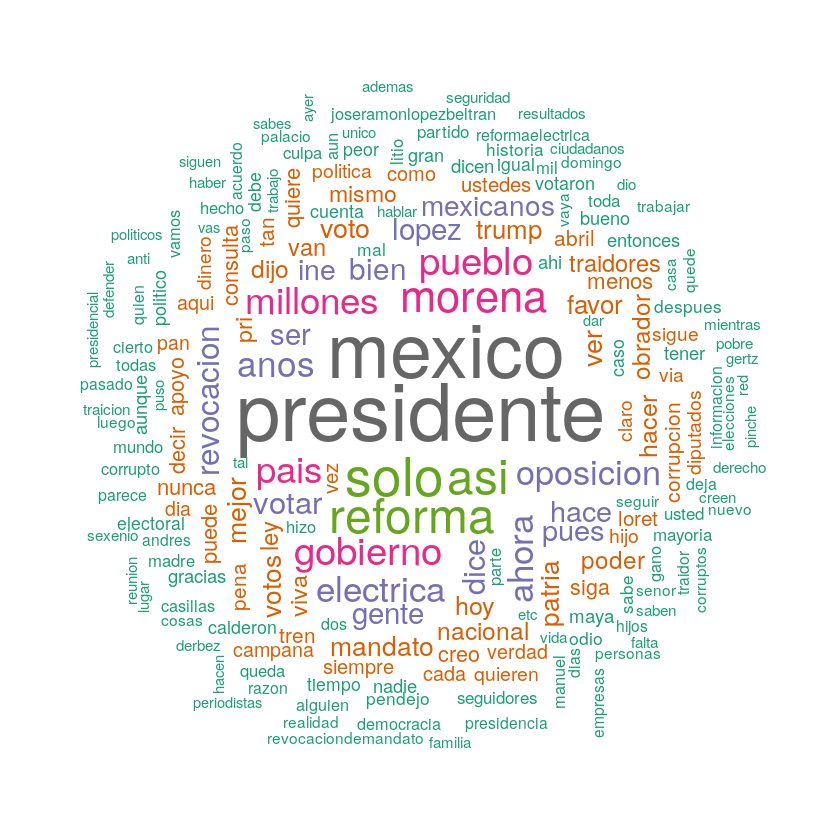

In [11]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

In [39]:
### Indicador::

pred1 <- as_tibble(read.csv("Prediction_Model1.csv"))
pred2 <- as_tibble(read.csv("Prediction_Model2.csv"))

In [22]:
head(pred1, 10)

X,text_val,pred_label
<int>,<chr>,<int>
0,alina fiesta paso tristeza tristeza uds acuerdo momento canel comitiva presidencial selfi risuenos cuerpos momento aun bajo escombros explicame gustaria entenderlos cuanta hipocresia dios salve,1
1,articulos loret siempre hablar mal,0
2,morena asesinan mujeres dos mujeres periodistas muertas culpa morena,0
3,felipe calderon padre fin comunicado,1
4,cacas cerebro bot punetero ahora niegas patron regalo unas gorras nunca pago gracias tragar dale gracias mesias lleva pan mesa atacarlo diario asi ustedes fachos traidores pndejos,1
5,razon comparan gustavo petro,1
6,haces pregunta dificil senor acaba nacer solo recuerdan,0
7,querido inteligente presidente cuidado digamos ocurrencias estupideces sabe bien millones pobres ignorantes mx apoyan ciegamente dependen migajas impuestos da confianza,0
8,tan dadivoso generos ayudandolos paises debe saben usted cosas turbias hiso quiere informen,1


In [40]:
pred <- pred1 |> left_join(pred2, by = "X") |> 
select(text_val.x, pred_label.x, pred_label.y) |> 
rename(text = text_val.x, pred_l2 = pred_label.x, pred_noreg = pred_label.y) |>
mutate(sim = ifelse(pred_l2 == pred_noreg, 1, 0))

In [27]:
head(pred, 10)

text,pred_l2,pred_noreg,sim
<chr>,<int>,<int>,<dbl>
alina fiesta paso tristeza tristeza uds acuerdo momento canel comitiva presidencial selfi risuenos cuerpos momento aun bajo escombros explicame gustaria entenderlos cuanta hipocresia dios salve,1,1,1
articulos loret siempre hablar mal,0,0,1
morena asesinan mujeres dos mujeres periodistas muertas culpa morena,0,0,1
felipe calderon padre fin comunicado,1,1,1
cacas cerebro bot punetero ahora niegas patron regalo unas gorras nunca pago gracias tragar dale gracias mesias lleva pan mesa atacarlo diario asi ustedes fachos traidores pndejos,1,0,0
razon comparan gustavo petro,1,1,1
haces pregunta dificil senor acaba nacer solo recuerdan,0,0,1
querido inteligente presidente cuidado digamos ocurrencias estupideces sabe bien millones pobres ignorantes mx apoyan ciegamente dependen migajas impuestos da confianza,0,0,1
tan dadivoso generos ayudandolos paises debe saben usted cosas turbias hiso quiere informen,1,1,1


In [41]:
tab <- function(frame_x, var_name){
     var_name <- enquo(var_name)
     frame_x |>
          group_by(!!var_name) |>
          summarise(n = n()) |>
          mutate(totalN = (cumsum(n)),
                 percent = round((n / sum(n)), 3),
                 cumuPer = round(cumsum(freq = n / sum(n)), 3))
}

In [45]:
pred_l2 <- tab(pred, pred_l2) |> select(pred_l2, n, percent) |> mutate(percent = 100*percent) 
pred_l2

pred_l2,n,percent
<int>,<int>,<dbl>
0,4691,46.9
1,5309,53.1


In [46]:
pred_noreg <- tab(pred, pred_noreg) |> select(pred_noreg, n, percent) |> mutate(percent = 100*percent) 
pred_noreg

pred_noreg,n,percent
<int>,<int>,<dbl>
0,4565,45.6
1,5435,54.3


In [47]:
pred_sim <- tab(pred, sim) |> select(sim, n, percent) |> mutate(percent = 100*percent) 
pred_sim

sim,n,percent
<dbl>,<int>,<dbl>
0,1932,19.3
1,8068,80.7
